In [38]:
import numpy as np
import random
from sklearn.datasets.samples_generator import make_classification
import pylab
from scipy import stats

In [39]:
# генерируем случайные данные для задачи классификации
x, y = make_classification (n_samples=100, n_features=8, n_informative=5)
x=np.abs(x)


In [40]:
x_t = x.transpose()

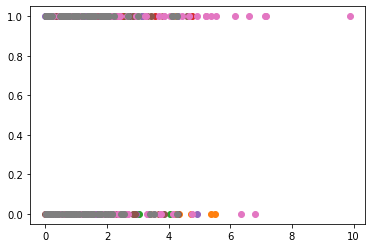

In [41]:
pylab.plot(x, y, 'o')
pylab.show()

In [13]:
# размер данных

m, n = np.shape(x)
m, n

(100, 8)

In [42]:
# преобразуем x к следующему виду
x = np.c_[ np.ones(m), x]
x[:5]

array([[1.        , 0.46379208, 1.36269197, 2.18625426, 0.46566674,
        1.06499212, 1.15815022, 1.13908924, 1.47980136],
       [1.        , 0.359025  , 0.49749964, 1.53494996, 0.08255334,
        1.55768596, 1.80540627, 0.78919426, 1.54721285],
       [1.        , 0.49312046, 0.12617334, 2.53849559, 1.61911645,
        1.14976089, 0.16114838, 1.03137375, 0.96943612],
       [1.        , 1.927466  , 2.98563576, 1.76570309, 4.76829418,
        1.31690072, 2.64291926, 5.37977381, 0.172001  ],
       [1.        , 0.36775784, 0.13973715, 1.45013725, 0.17698981,
        1.78521941, 0.88081299, 1.48748393, 1.3810929 ]])

In [43]:
# y лист значений
y[:5]

array([1, 0, 1, 1, 0])

In [16]:
# шаг алгоритма
alpha = 0.01

In [44]:
def gradient_descent_3(alpha, x, y, numIterations):
    """
    Функция реализует алгоритм градиентного спуска. На каждом шаге выводится значение функции потерь
    """
    
    m = x.shape[0] # 100
    theta = np.ones(9) # [ 1.  1.]
    x_transpose = x.transpose() # транспонированная матрица x
    
    for iter in range( 0, numIterations ):
        hypothesis = np.dot(x, theta)
        # матричное произведение
        
        loss = hypothesis - y
        J = np.sum(loss ** 2) / (2 * m)  # функция потерь
        
        print( "iter %s | J: %.3f" % (iter, J) )
        
        gradient = np.dot(x_transpose, loss) / m         
        theta = theta - alpha * gradient  # update
    
    return theta

In [45]:
%%time
theta = gradient_descent_3(alpha, x, y, 1000)

iter 0 | J: 71.822
iter 1 | J: 46.718
iter 2 | J: 30.500
iter 3 | J: 20.019
iter 4 | J: 13.240
iter 5 | J: 8.851
iter 6 | J: 6.005
iter 7 | J: 4.155
iter 8 | J: 2.950
iter 9 | J: 2.161
iter 10 | J: 1.641
iter 11 | J: 1.296
iter 12 | J: 1.063
iter 13 | J: 0.904
iter 14 | J: 0.793
iter 15 | J: 0.713
iter 16 | J: 0.655
iter 17 | J: 0.609
iter 18 | J: 0.574
iter 19 | J: 0.544
iter 20 | J: 0.519
iter 21 | J: 0.497
iter 22 | J: 0.478
iter 23 | J: 0.461
iter 24 | J: 0.445
iter 25 | J: 0.430
iter 26 | J: 0.416
iter 27 | J: 0.403
iter 28 | J: 0.391
iter 29 | J: 0.379
iter 30 | J: 0.368
iter 31 | J: 0.358
iter 32 | J: 0.349
iter 33 | J: 0.339
iter 34 | J: 0.331
iter 35 | J: 0.323
iter 36 | J: 0.315
iter 37 | J: 0.308
iter 38 | J: 0.301
iter 39 | J: 0.294
iter 40 | J: 0.288
iter 41 | J: 0.282
iter 42 | J: 0.276
iter 43 | J: 0.271
iter 44 | J: 0.266
iter 45 | J: 0.261
iter 46 | J: 0.256
iter 47 | J: 0.252
iter 48 | J: 0.248
iter 49 | J: 0.244
iter 50 | J: 0.240
iter 51 | J: 0.236
iter 52 | J: 0.23

In [52]:
theta

array([ 0.45236415, -0.01981323,  0.0359397 ,  0.00549428,  0.01117261,
       -0.06635298, -0.13973532,  0.12643723,  0.00092149])

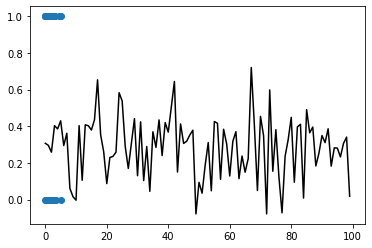

In [20]:
# построим полученную линию из theta
for i in range(x.shape[1]):
    y_predict = theta[0] + theta[1]*x_t[0] + theta[2]*x_t[1] + theta[3]*x_t[2] + theta[4]*x_t[3] + theta[5]*x_t[4] 
    + theta[6]*x_t[5] +  + theta[8]*x_t[7] + theta[7]*x_t[6]
    
# рисуем результат
pylab.plot(x[:,2],y,'o')
pylab.plot (y_predict,'k-')
pylab.show()


In [21]:
#Градиентный бустинг для логистической регрессии

def gradient_descent_4(alpha, x, y, numIterations):
    """
    Функция реализует алгоритм градиентного спуска. На каждом шаге выводится значение функции потерь
    """
    
    m = x.shape[0] 
    theta = np.ones(9) 
    x_transpose = x.transpose() # транспонированная матрица x
    
    for iter in range( 0, numIterations ):
        step1 = np.dot(x, theta)
        hypothesis = 1/ (1 + np.exp(-step1)) # матричное произведение
        
        
        h_t = hypothesis.transpose()
        
        loss = hypothesis - y
        logloss = ((y-1)* np.log(np.abs(1-hypothesis))) - (y * np.log(np.abs(hypothesis)))
                                                   
        J = np.sum(logloss)/m  # функция потерь    
        
        print( "iter %s | J: %.3f" % (iter, J) )
        
        gradient = np.dot(x_transpose, loss) / m 
        theta = theta - alpha * gradient  # update
    
    return theta

In [22]:
theta = gradient_descent_4(alpha, x, y, 1000)

iter 0 | J: 6.011
iter 1 | J: 5.968
iter 2 | J: 5.926
iter 3 | J: 5.884
iter 4 | J: 5.842
iter 5 | J: 5.800
iter 6 | J: 5.758
iter 7 | J: 5.716
iter 8 | J: 5.674
iter 9 | J: 5.631
iter 10 | J: 5.589
iter 11 | J: 5.547
iter 12 | J: 5.505
iter 13 | J: 5.463
iter 14 | J: 5.421
iter 15 | J: 5.379
iter 16 | J: 5.337
iter 17 | J: 5.294
iter 18 | J: 5.252
iter 19 | J: 5.210
iter 20 | J: 5.168
iter 21 | J: 5.126
iter 22 | J: 5.084
iter 23 | J: 5.042
iter 24 | J: 5.000
iter 25 | J: 4.958
iter 26 | J: 4.916
iter 27 | J: 4.873
iter 28 | J: 4.831
iter 29 | J: 4.789
iter 30 | J: 4.747
iter 31 | J: 4.705
iter 32 | J: 4.663
iter 33 | J: 4.621
iter 34 | J: 4.579
iter 35 | J: 4.537
iter 36 | J: 4.495
iter 37 | J: 4.453
iter 38 | J: 4.411
iter 39 | J: 4.369
iter 40 | J: 4.327
iter 41 | J: 4.284
iter 42 | J: 4.242
iter 43 | J: 4.200
iter 44 | J: 4.158
iter 45 | J: 4.116
iter 46 | J: 4.074
iter 47 | J: 4.032
iter 48 | J: 3.990
iter 49 | J: 3.948
iter 50 | J: 3.906
iter 51 | J: 3.864
iter 52 | J: 3.823
ite

# Проверка на готовых алгоритмах sklearn

In [31]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression


In [47]:
model = linear_model.SGDClassifier( alpha = 0.01, max_iter = 1000 )

In [48]:
model.fit( x, y )

SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [49]:
model.coef_

array([[ 0.24810062, -0.57479626, -0.0139277 , -0.24570736, -0.17573968,
        -0.63290506, -0.97859488,  0.70520132, -0.26981515]])

In [53]:
model1 = LogisticRegression()

In [54]:
model1.fit( x, y )

C:\Users\seminaae\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
model1.coef_

array([[ 0.35391204, -0.32287536,  0.10072351, -0.07953684, -0.07306866,
        -0.36460524, -0.77911122,  0.6389524 , -0.14145273]])